### Importaciones

In [2]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD

### Carga del CSV

In [5]:
data_set = pd.read_csv("datasets_calificaciones.csv", sep=",")

data_set.isnull().sum()

#  * limpiar los datos
data_set.replace(['NaN'], pd.NA, inplace=True)
data_set.replace([' '], 0, inplace=True)
data_set.dropna(inplace=True)

# * comprobar la cantidad e nulos
data_set.isnull().sum()

data_set = data_set[0:100]

data_set["Final"] = pd.to_numeric(data_set["Final"])
data_set["Parcial 1"] = pd.to_numeric(data_set["Parcial 1"])
data_set["Parcial 2"] = pd.to_numeric(data_set["Parcial 2"])

print(data_set[["estudiante", "Final"]])


         estudiante  Final
0         ana pérez    9.0
2       maría gómez    9.5
3   pedro rodríguez    7.0
4      laura vargas    8.5
5       javier soto    6.0
..              ...    ...
94   lorenzo castro    9.1
95  josefina torres    7.2
97        emma soto    6.4
98       mateo díaz    0.0
99  sofía fernández    7.5

[74 rows x 2 columns]


### Graficar los datos.

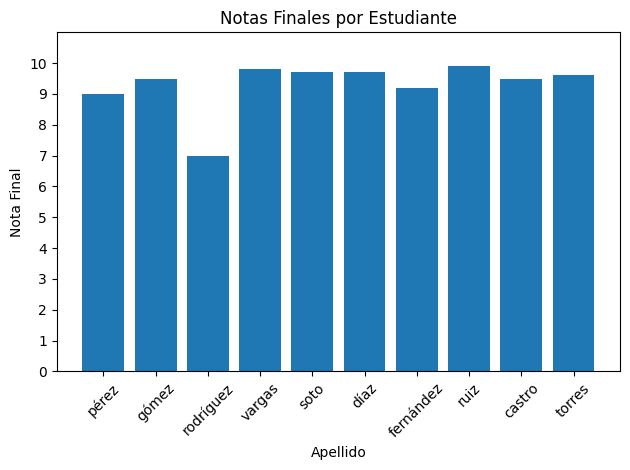

In [6]:
# Gráfico de barras normales (más valor = más alta la barra)
plt.bar(data_set["estudiante"].apply(lambda x: x.split()[-1]), data_set["Final"])

# Eje Y correcto
plt.ylim(0, 11)               # De 0 a 10 (crecimiento hacia arriba)
plt.yticks(range(0, 11, 1))   # Ticks en el eje Y de 0 a 10

# Etiquetas
plt.xlabel("Apellido")
plt.ylabel("Nota Final")
plt.title("Notas Finales por Estudiante")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Datos para el analisis

In [ ]:
datos_parcial_1 = data_set["Parcial 1"]
datos_parcial_2 = data_set["Parcial 2"]

data_set["Aprovados"] = data_set["Final"].apply(lambda x: True if x>=6 else False)

x = data_set["Final"].values
y = data_set["Aprovados"].values


print(y)


74


### Configuracion del Modelo secuencial

In [ ]:

# * tamaño de la entrada de datos
input_dim = 1
# * tamaño de la salida de datos
output_dim = 1

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='sigmoid'))

c:\Users\IPF-2025\Desktop\MATERIALES\py-ciencia-datos-practica\keras-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Optimizador

In [19]:

# * tasa de aprendizaje 
sgd = SGD(learning_rate=0.01)

### Compilar el modelo

In [23]:

# * definir la funcion de perdida y el optimizador (error cuadratico medio = mse)
modelo.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

Imprimir informacion del modelo

In [24]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

In [25]:
num_epochs = 200
batch_size = x.shape[0] 

history = modelo.fit(x,y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9459 - loss: 0.1489
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9459 - loss: 0.1140
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9459 - loss: 0.1100
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9459 - loss: 0.1094
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9459 - loss: 0.1090
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9459 - loss: 0.1090
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9459 - loss: 0.1090
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9459 - loss: 0.1089
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9459 - loss: 0.1089
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9459 - loss: 0.1089
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9459 - loss: 0.1089
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9459 - l

Parámetros: w = 0.1519, b = -0.0775
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002643F63C040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


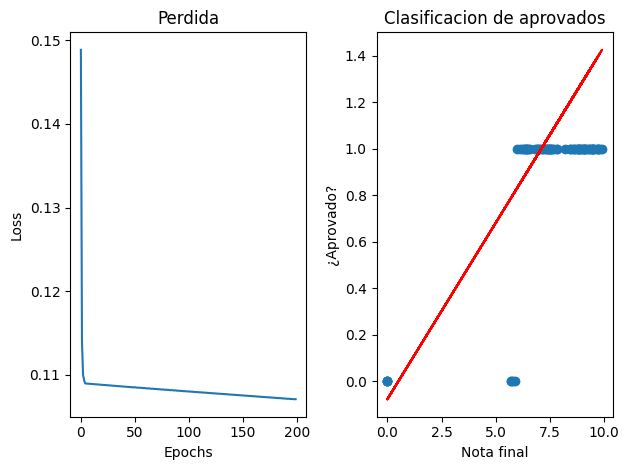

In [26]:
capas = modelo.layers[0]
w, b = capas.get_weights()
print(f"Parámetros: w = {w[0][0]:.4f}, b = {b[0]:.4f}")

# * Graficar la perdida
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Perdida")

# * Graficar las predicciones
y_regr = modelo.predict(x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr, "r")
plt.xlabel("Nota final")
plt.ylabel("¿Aprovado?")
plt.title("Clasificacion de aprovados")
plt.tight_layout()

### Probar una nueva prediccion

In [30]:
nueva_nota = np.array([9])
probabilidad = modelo.predict(nueva_nota)[0][0]
print("La prediccion sera: ", probabilidad )
print("¿Aprobado?", probabilidad >= 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La prediccion sera:  1.2892982
¿Aprobado? True
